In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

## Data Preparation

In [4]:
df = pd.read_csv('insurance.csv') #Data-Frame

print(df.shape)
df.head(10)

(1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16.885
1,18,male,33.770,1,no,southeast,1.726
2,28,male,33.000,3,no,southeast,4.449
3,33,male,22.705,0,no,northwest,21.984
4,32,male,28.880,0,no,northwest,3.867
5,31,female,25.740,0,no,southeast,3.757
6,46,female,33.440,1,no,southeast,8.241
7,37,female,27.740,3,no,northwest,7.282
8,37,male,29.830,2,no,northeast,6.406
9,60,female,25.840,0,no,northwest,28.923


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13.270415
std,14.049960,6.098187,1.205493,12.110013
min,18.000000,15.960000,0.000000,1.122000
25%,27.000000,26.296250,0.000000,4.740000
50%,39.000000,30.400000,1.000000,9.382000
75%,51.000000,34.693750,2.000000,16.640000
max,64.000000,53.130000,5.000000,63.770000


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


#### *Dealing with Categorical Features*

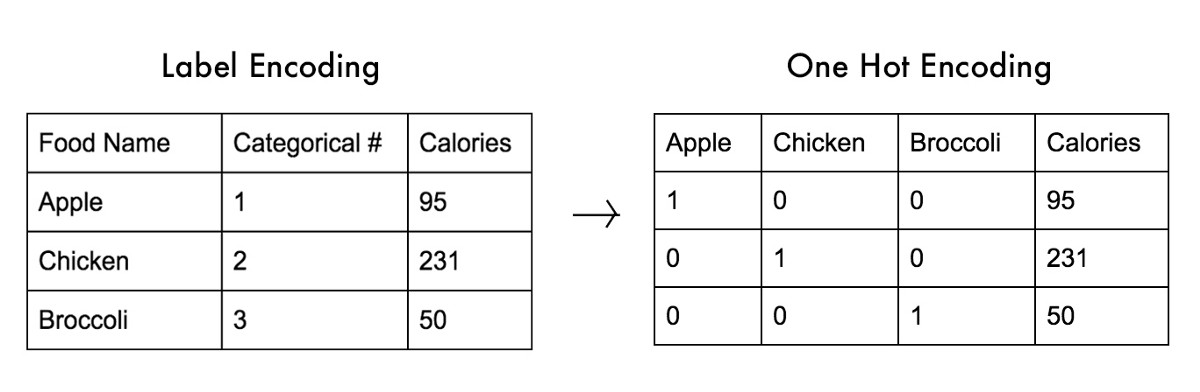

We can use label encoding for binary columns (yes/no, female/male, ...) but for features with multiple possible values, it's usually better to use one-hot encoding. 

In [52]:
from sklearn.preprocessing import LabelEncoder

sex_column_encoder = LabelEncoder().fit(df["sex"])
df["sex"] = sex_column_encoder.transform(df["sex"])
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16.885
1,18,1,33.770,1,no,southeast,1.726
2,28,1,33.000,3,no,southeast,4.449
3,33,1,22.705,0,no,northwest,21.984
4,32,1,28.880,0,no,northwest,3.867
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,no,northwest,10.601
1334,18,0,31.920,0,no,northeast,2.206
1335,18,0,36.850,0,no,southeast,1.630
1336,21,0,25.800,0,no,southwest,2.008


In [54]:
df = pd.get_dummies(df, columns = ["smoker","region"])
df

,age,sex,bmi,children,charges,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,16.885,0,1,0,0,0,1
1,18,1,33.770,1,1.726,1,0,0,0,1,0
2,28,1,33.000,3,4.449,1,0,0,0,1,0
3,33,1,22.705,0,21.984,1,0,0,1,0,0
4,32,1,28.880,0,3.867,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,10.601,1,0,0,1,0,0
1334,18,0,31.920,0,2.206,1,0,1,0,0,0
1335,18,0,36.850,0,1.630,1,0,0,0,1,0
1336,21,0,25.800,0,2.008,1,0,0,0,0,1


In [59]:
X = df.loc[:, df.columns != "charges"]
X

,age,sex,bmi,children,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,0,1,0,0,0,1
1,18,1,33.770,1,1,0,0,0,1,0
2,28,1,33.000,3,1,0,0,0,1,0
3,33,1,22.705,0,1,0,0,1,0,0
4,32,1,28.880,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,1,0,0,1,0,0
1334,18,0,31.920,0,1,0,1,0,0,0
1335,18,0,36.850,0,1,0,0,0,1,0
1336,21,0,25.800,0,1,0,0,0,0,1


In [60]:
y = df["charges"]
y

0       16.885
1        1.726
2        4.449
3       21.984
4        3.867
         ...  
1333    10.601
1334     2.206
1335     1.630
1336     2.008
1337    29.141
Name: charges, Length: 1338, dtype: float64

In [61]:
X = X.values
y = y.values.reshape(-1,1)

In [62]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Comparing the models

## *Naive* Model

A naive approach could be that the prediction for new models would just simply be the average of train outputs.

In [76]:
y_avg = np.mean(y_train)

#Find the MSE of train and test sets' prediction
mse_naive_train = 1/len(y_train) * np.sum((y_train-y_avg)**2)
mse_naive_test = 1/len(y_test) * np.sum((y_test-y_avg)**2)
print("MSE of train set:", mse_naive_train)
print("MSE of test set:", mse_naive_test)

MSE of train set: 143.36633116165257
MSE of test set: 159.24893640367736


## *Linear Regression* Model

In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as MSE

#Build an instance of Linear Regression model
lr_model = LinearRegression()
#Fit the model on train set
lr_model.fit(X_train, y_train)

#Prediction of the model on the train and test sets
y_pred_train = lr_model.predict(X_train)
y_pred_test = lr_model.predict(X_test)

#Find the MSE of train and test sets' prediction
mse_train = MSE(y_train, y_pred_train)
mse_test = MSE(y_test, y_pred_test)
print("MSE of train set:", mse_train)
print("MSE of test set:", mse_test)

MSE of train set: 37.70157819450572
MSE of test set: 31.827751322892194
